In [15]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt

<font size="5">**Punto 1**.</font>

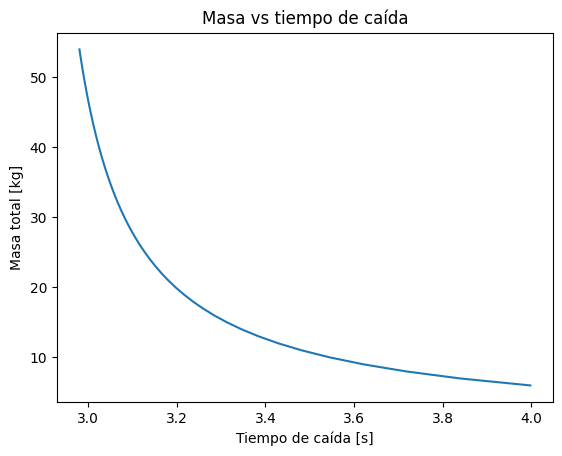

In [16]:
sin = np.sin
cos = np.cos

def system(t,y, theta, gamma, mass,h):
    g = 9.81
    x,v = y
    return [v, g*sin(theta) - (gamma/mass)*v**2] #Primero se pone la ecuacion dif. correspondiente a x [dx/dt = v], luego la de v [a=dv/dt=....]


def stop(t, y, theta,gamma,mass, h):
    x,v = y
    return x-h/sin(theta)
stop.terminal = True  
stop.direction = 1

masas = np.arange(1,50,1)
tiempos_caida = np.zeros(np.size(masas))
theta = np.deg2rad(30)
h = 10
y0 = np.array([0.,0.])
t_span = (0,10) #tiempos desde 0 a 10s
masa0 = 5
j = 0
for i in masas:
    args = [theta, 0.7, masa0 + i,h] #ángulo theta, coeficiente gamma y la masa
    sol = solve_ivp(
        system, 
        y0=y0, 
        t_span=t_span, 
        args=args, 
        max_step=0.05,
        events=stop
        )
    coord = np.array([cos(theta)*sol.y[0], sin(-theta)*sol.y[0]])
    coord[1,:] += h
    if sol.t_events[0].size > 0:  # Si el evento se activó
        tiempo_caida = sol.t_events[0][0]
        tiempos_caida[j] = tiempo_caida
        j+=1


plt.plot(tiempos_caida, masas+5) 
plt.title("Masa vs tiempo de caída")
plt.ylabel("Masa total [kg]")
plt.xlabel("Tiempo de caída [s]")
plt.show()